$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 2: Neural Network Regression

Damian Armijo

## Overview

The goal of this assignment is to learn about object-oriented programming in python and to gain some experience in comparing different sized neural networks when applied to a data set.

Starting with the ```NeuralNetwork``` class from the lecture notes, you will create one new version of that class, apply it to a data set, and discuss the results.

## Required Code

Start with the ```NeuralNetwork``` class defined in lecture notes 09. Put that class definition as written into *neuralnetworks.py* into your current directory.  Also place *mlutilities.py* from lecture notes 09 in your current directory. If this is done correctly, then the following code should run and produce results similar to what is shown here.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import neuralnetworks as nn

X = np.arange(10).reshape((-1,1))
T = np.sin(X)

nnet = nn.NeuralNetwork(1, [10], 1)
nnet.train(X, T, 100, verbose=True)
nnet

SCG: Iteration 10 fValue Eval 0.473273931592 Scale 0.004096
SCG: Iteration 20 fValue Eval 0.105696596303 Scale 0.000256
SCG: Iteration 30 fValue Eval 0.0785925553354 Scale 2.5e-07
SCG: Iteration 40 fValue Eval 0.029287228116 Scale 3.90625e-09
SCG: Iteration 50 fValue Eval 0.0115304071858 Scale 3.814697265625e-12
SCG: Iteration 60 fValue Eval 0.00787663174644 Scale 3.725290298461914e-15
SCG: Iteration 70 fValue Eval 0.00541294272552 Scale 1e-15
SCG: Iteration 80 fValue Eval 0.00348674308944 Scale 1e-15
SCG: Iteration 90 fValue Eval 0.00222201185659 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.00206559645538 Scale 1e-15


NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.1715 seconds. Final error is 0.0454488333775885.

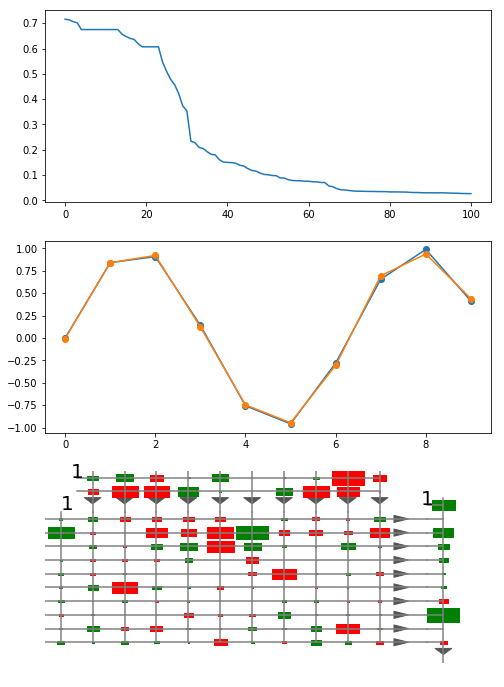

In [6]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

Now let's extract the parts of the neural network code that refer to the activation function and its derivative into two new methods.  Copy your file *neuralnetworks.py* into a new file named *neuralnetworks2.py*.  Modify the code in *neuralnetworksA2.py* by adding these two methods to the ```NeuralNetwork``` class:

    def activation(self, weighted_sum):
        return np.tanh(weighted_sum)
        
    def activationDerivative(self, activation_value):
        return 1 - activation_value * activation_value
        
Now replace the code in the appropriate places in the ```NeuralNetwork``` class so that ```np.tanh``` is replaced with a call to the ```self.activation``` method and its derivative is replaced by calls to ```self.activationDerivative```.

In [24]:
import neuralnetworksA2 as nn2

nnet = nn2.NeuralNetwork(1, [10], 1)

In [25]:
[nnet.activation(s) for s in [-2, -0.5, 0, 0.5, 2]]

[-0.9640275800758169,
 -0.46211715726000974,
 0.0,
 0.46211715726000974,
 0.9640275800758169]

In [26]:
[nnet.activationDerivative(nnet.activation(s)) for s in [-2, -0.5, 0, 0.5, 2]]

[0.070650824853164429,
 0.7864477329659274,
 1.0,
 0.7864477329659274,
 0.070650824853164429]

In [27]:
nnet.train(X, T, 100, verbose=True)
nnet

SCG: Iteration 10 fValue Eval 0.258213377447 Scale 2.5e-07
SCG: Iteration 20 fValue Eval 0.205378716565 Scale 0.065536
SCG: Iteration 30 fValue Eval 0.0767245896306 Scale 0.000128
SCG: Iteration 40 fValue Eval 0.0455273803723 Scale 0.004096
SCG: Iteration 50 fValue Eval 0.0272040535268 Scale 8e-06
SCG: Iteration 60 fValue Eval 0.0134409771848 Scale 7.8125e-09
SCG: Iteration 70 fValue Eval 0.00654948006143 Scale 7.62939453125e-12
SCG: Iteration 80 fValue Eval 0.00455808219059 Scale 7.450580596923828e-15
SCG: Iteration 90 fValue Eval 0.00160988088589 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.000843954142083 Scale 1e-15


NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.1717 seconds. Final error is 0.029050888834650422.

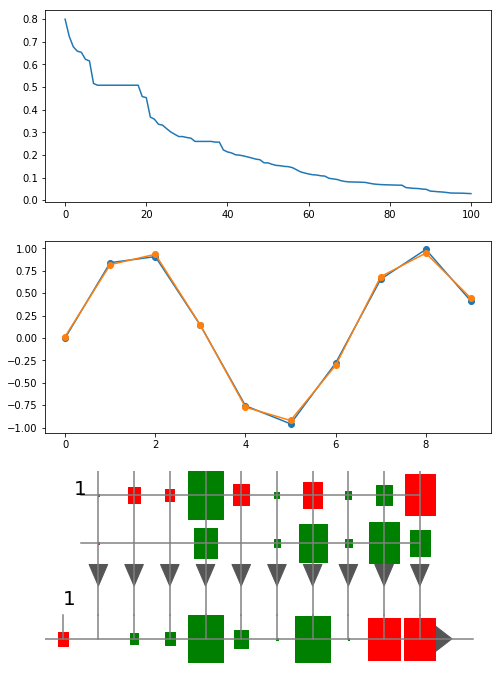

In [28]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

## Neural Network Performance with Different Hidden Layer Structures and Numbers of Training Iterations

### Example with Toy Data

Using your new ```NeuralNetwork``` class, you can compare the error obtained on a given data set by looping over various hidden layer structures.  Here is an example using the simple toy data from above.

In [14]:
import random

nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
Xtest, Ttest = X[testRows, :], T[testRows, :]

In [15]:
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((8, 1), (8, 1), (2, 1), (2, 1))

In [16]:
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]
                       0             1         2
0                      0  6.767618e-01  0.675917
1                    [1]  5.394533e-01  0.790403
2                 [1, 1]  5.394409e-01  0.790281
3              [1, 1, 1]  5.394409e-01  0.790281
4           [1, 1, 1, 1]  5.394409e-01  0.790281
5        [1, 1, 1, 1, 1]  6.147813e-01  0.776362
6                    [5]  1.152020e-14  0.601125
7                 [5, 5]  8.960157e-15  0.503593
8              [5, 5, 5]  7.341468e-16  0.643334
9           [5, 5, 5, 5]  1.838493e-14  0.662861
10       [5, 5, 5, 5, 5]  1.366336e-14  0.974593
11                  [10]  1.547624e-14  0.594133
12              [10, 10]  4.5

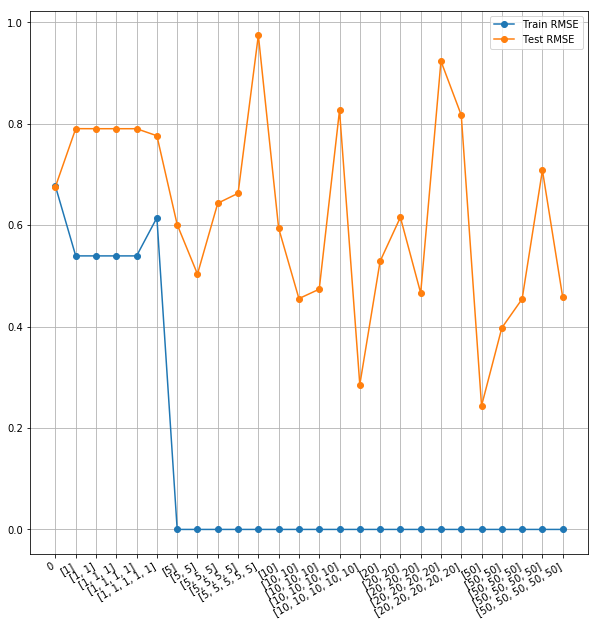

In [29]:
import pandas as pd

errors = []
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)
for hids in hiddens: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)
print(errors)

plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

For this data (and the random shuffling of the data used when this notebook was run), `[10, 10, 10, 10]` produced the lowest test error.  

Now, using the best hidden layer structure found, write the code that varies the number of training iterations. The results you get will be different from the ones shown below.

[10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
      0             1         2
0    10  6.424157e-01  0.798941
1    20  3.908323e-01  0.317037
2    50  1.603134e-01  0.315626
3   100  1.360057e-04  1.142212
4   150  7.674140e-05  0.732662
5   200  2.336300e-06  0.705944
6   250  2.378018e-14  0.990017
7   300  7.978775e-15  0.886406
8   350  2.197363e-15  0.554479
9   400  7.086698e-13  0.346092
10  450  8.400234e-14  0.842429
11  500  2.477020e-15  0.419733


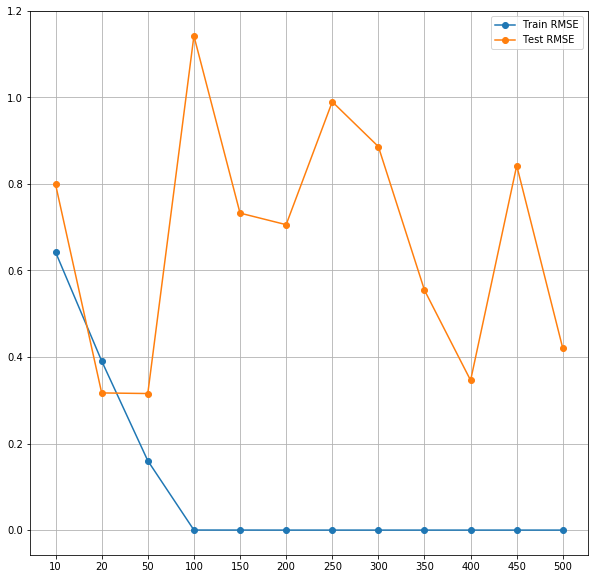

In [21]:
import pandas as pd
errors = []
nIterationsList = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
hiddens = [10,10,10,10] #[0] + [nu * nl for nu in nIterationsList for nl in [1]]
#print('hiddens =', hiddens)
#for iternum in nIterationsList:
    #print(iternum)
#for n in range(len(nIterationsList)):
for hids in nIterationsList: 
    #print('hids', hids)
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], [10,10,10,10], Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, hids)
    #nIterationsList.append([nnet.use(Xtrain),nnet.use(Xtest)])
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])

errors = pd.DataFrame(errors)

#  ...  insert code here using the code in the previous code block as a guide ...

print(nIterationsList)
print(errors)
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), nIterationsList) #, rotation=30, horizontalalignment='right')
plt.grid(True)

In [20]:
X = np.arange(300).reshape((-1, 3))
T = X[:,0:2] + 0.1 * X[:,1:2] * X[:,2:3]
print(T.shape)
print(X.shape)
import neuralnetworksA2 as nn2

nnet = nn2.NeuralNetwork(3, [10], 2)
print(nnet.activation(-0.8))
print(nnet)
nnet.train(X, T, 100)
error = np.sqrt(np.mean((T - nnet.use(X))**2))

(100, 2)
(100, 3)
-0.664036770268
NeuralNetwork(3, [10], 2)  Network is not trained.


### Experiments wtih Automobile Data

Now, repeat the above steps with the automobile mpg data we have used before.  Set it up to use 

  * cylinders,
  * displacement,
  * weight,
  * acceleration,
  * year, and
  * origin
  
as input variables, and

  * mpg
  * horsepower
  
as output variables.

In [99]:
def makeMPGData(filename='auto-mpg.data'):
    np.set_printoptions(suppress=True)
    #np.set_printoptions(precision=4)
    def missingIsNan(s):
        return np.nan if s == b'?' else float(s)
    data = np.loadtxt(filename, usecols=range(8), converters={3: missingIsNan})
    print("Read",data.shape[0],"rows and",data.shape[1],"columns from",filename)
    goodRowsMask = np.isnan(data).sum(axis=1) == 0
    data = data[goodRowsMask,:]
    print("After removing rows containing question marks, data has",data.shape[0],"rows and",data.shape[1],"columns.")
    X = data[:,1:3]
    otherX = data[:,4:]
    X = np.hstack((X,otherX))
    #print(X.shape)
    #print(X)
    #print(otherX.shape)
    #print(otherX)
    T = data[:,0:1]
    otherT = data[:,3:4]
    T = np.hstack((T, otherT))
    Xnames =  ['cylinders','displacement','weight','acceleration','year','origin']
    print(X.shape)
    print(Xnames)
    print(X)
    Tnames = ['mpg', 'horsepower']
    print(T.shape)
    print(Tnames)
    print(T)
    return X,T,Xnames,Tnames

In [100]:
X,T,Xnames,Tname = makeMPGData()

Read 398 rows and 8 columns from auto-mpg.data
After removing rows containing question marks, data has 392 rows and 8 columns.
(392, 6)
['cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin']
[[    8.    307.   3504.     12.     70.      1. ]
 [    8.    350.   3693.     11.5    70.      1. ]
 [    8.    318.   3436.     11.     70.      1. ]
 ..., 
 [    4.    135.   2295.     11.6    82.      1. ]
 [    4.    120.   2625.     18.6    82.      1. ]
 [    4.    119.   2720.     19.4    82.      1. ]]
(392, 2)
['mpg', 'horsepower']
[[  18.   130. ]
 [  15.   165. ]
 [  18.   150. ]
 [  16.   150. ]
 [  17.   140. ]
 [  15.   198. ]
 [  14.   220. ]
 [  14.   215. ]
 [  14.   225. ]
 [  15.   190. ]
 [  15.   170. ]
 [  14.   160. ]
 [  15.   150. ]
 [  14.   225. ]
 [  24.    95. ]
 [  22.    95. ]
 [  18.    97. ]
 [  21.    85. ]
 [  27.    88. ]
 [  26.    46. ]
 [  25.    87. ]
 [  24.    90. ]
 [  25.    95. ]
 [  26.   113. ]
 [  21.    90. ]
 [  10.   215. ]
 [ 

In [104]:
print(T.shape)
print(X.shape)
import neuralnetworksA2 as nn2

nnet = nn2.NeuralNetwork(6, [10], 2)
print(nnet.activation(-0.8))
print(nnet)
nnet.train(X, T, 100)
print(nnet)
error = np.sqrt(np.mean((T - nnet.use(X))**2))
print(error)
#import random
#nRows = X.shape[0]
#rows = np.arange(nRows)
#np.random.shuffle(rows)
#nTrain = int(nRows * 0.8)
#trainRows = rows[:nTrain]
#testRows = rows[nTrain:]
#Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
#Xtest, Ttest = X[testRows, :], T[testRows, :]

(392, 2)
(392, 6)
-0.664036770268
NeuralNetwork(6, [10], 2)  Network is not trained.
NeuralNetwork(6, [10], 2)
   Network was trained for 101 iterations that took 0.4776 seconds. Final error is 0.19646520557865768.
7.15064647395


Include the code, output, and graphs like the above examples. Discuss the results.  Investigate and discuss how much the best hidden layer structure and number of training iterations vary when you repeat the runs.

## Grading and Check-in

Your notebook will be run and graded automatically. Test this grading process by first downloading [A2grader.tar](http://www.cs.colostate.edu/~anderson/cs445/notebooks/A2grader.tar) and extract `A2grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of  60 / 60 if your functions and class are defined correctly. The remaining 40 points will be based on the results you obtain from the comparisons of hidden layer structures and numbers of training iterations on the automobile data.

For the grading script to run correctly, you must first name this notebook as `Lastname-A2.ipynb` with `Lastname` being your last name, and then save this notebook.  Your working director must also contain `neuralnetworksA2.py` and `mlutilities.py` from lecture notes.

Combine your notebook and `neuralnetworkA2.py` into one zip file or tar file.  Name your tar file `Lastname-A2.tar` or your zip file `Lastname-A2.zip`.  Check in your tar or zip file using the `Assignment 2` link in Canvas.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include other tests.

In [3]:
%run -i A2grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Armijo-A2.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing  import neuralnetworksA2 as nn

--- 10/10 points. The statement  import neuralnetworksA2 as nn  works.

Testing nnet = nn.NeuralNetwork(1, 10, 1)

--- 10/10 points. nnet correctly constructed

Testing a = nnet.activation(-0.8)

--- 10/10 points. activation of -0.6640367702678491 is correct.

Testing da = nnet.activationDerivative(-0.664)

--- 10/10 points. activationDerivative of 0.5591039999999999 is correct.

Testing X = np.arange(300).reshape((-1, 3))
        T = X[:,0:2] + 0.1 * X[:,1:2] * X[:,2:3]
        import neuralnetworksA2 as nn
        nnet = nn.NeuralNetwork(3, [20, 10], 2)
        nnet.train(X, T, 100)
        error = np.sqrt(np.mean((T - nnet.use(X))**2))

--- 20/20 points. The error of 1.8200802179709321 is correct.

A2 Execut

## Extra Credit

Repeat the comparisons of hidden layer structures and numbers of training iterations on a second data set from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml).